**Course Name:** Deep Learning

**Lab Title:** Experiment 5.3: Sequence Text Classification using LSTM

[Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)


**Objective**: To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow --quiet


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [ ]:
#Load your spam dataset
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Encode labels and split
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)


In [ ]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [ ]:
# Build Simple LSTM
model1 = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

# Train
model1.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.8688 - loss: 0.4389 - val_accuracy: 0.8565 - val_loss: 0.4127
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.8620 - loss: 0.4032 - val_accuracy: 0.8565 - val_loss: 0.4131
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8555 - loss: 0.4143 - val_accuracy: 0.8565 - val_loss: 0.4167
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.8664 - loss: 0.3948 - val_accuracy: 0.8565 - val_loss: 0.4117
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8706 - loss: 0.3859 - val_accuracy: 0.8565 - val_loss: 0.4119


In [ ]:
# BiLSTM Model
model2 = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

# Train
model2.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.8797 - loss: 0.3529 - val_accuracy: 0.9664 - val_loss: 0.1013
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9776 - val_loss: 0.0788
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.9958 - loss: 0.0158 - val_accuracy: 0.9731 - val_loss: 0.0936
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.9964 - loss: 0.0150 - val_accuracy: 0.9821 - val_loss: 0.0896
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9798 - val_loss: 0.0803


In [ ]:
#LSTM with Dropout
model3 = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

# Train
model3.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8552 - loss: 0.4512 - val_accuracy: 0.8565 - val_loss: 0.4149
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.8625 - loss: 0.4045 - val_accuracy: 0.8565 - val_loss: 0.4148
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.8668 - loss: 0.3968 - val_accuracy: 0.8565 - val_loss: 0.4125
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8558 - loss: 0.4194 - val_accuracy: 0.8565 - val_loss: 0.4145
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8738 - loss: 0.3801 - val_accuracy: 0.8565 - val_loss: 0.4132


In [ ]:
def evaluate_model(model, X_test_pad, y_test):
    y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Accuracy: 0.8654708520179372
Precision: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

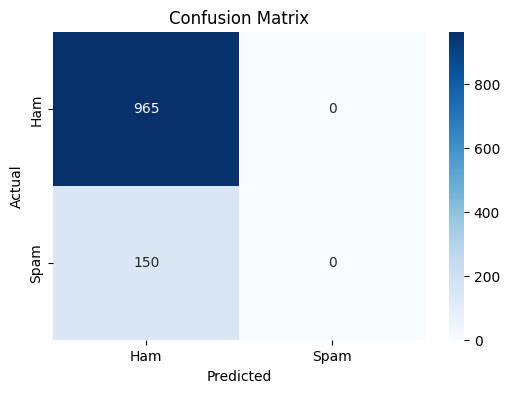

In [ ]:
evaluate_model(model1, X_test_pad, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step
Accuracy: 0.9820627802690582
Precision: 0.9779411764705882
F1 Score: 0.9300699300699301

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



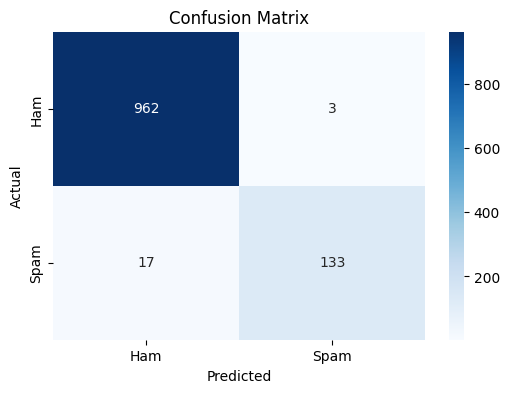

In [ ]:
evaluate_model(model2, X_test_pad, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
Accuracy: 0.8654708520179372
Precision: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

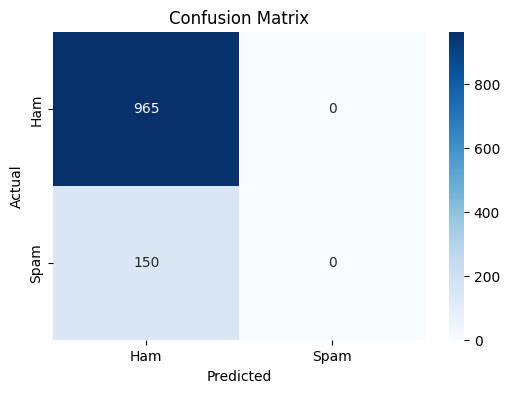

In [ ]:
evaluate_model(model3, X_test_pad, y_test)